<a href="https://colab.research.google.com/github/Lizcardiel/Big-Data-Architecture/blob/main/Introduction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Things to go over:
- (1) Missing Values
    - Checking NaN values
    - Dropping NaN values
- Transforming columns
    - Example: Removing $ from a string
- Detecting outliers
- Dummy variables
- Getting dates in the proper format

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/marketing 12.48.32.csv", delimiter = ';')

In [ ]:
data.shape

(4572, 5)

In [ ]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,1600.0,6.566231,2.907983,NaN,$54.73
1,1300.0,9.237765,2.409567,Mega,$46.68
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,6.922304,Mega,$298.25
4,1500.0,18.239147,1.405998,Micro,$56.59


In [ ]:
data.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.describe()

# Missing Values

In [ ]:
# Check NaN values in each column.
for column in data.columns:
    print(column, data[column].isnull().sum())

TV 12
Radio 2
Social Media 8
Influencer 2
Sales 2


In [ ]:
# Drop a row if there is a NaN in ANY column
data.dropna()

,TV,Radio,Social Media,Influencer,Sales
1,1300.0,9.237765,2.409567,Mega,$46.68
4,1500.0,18.239147,1.405998,Micro,$56.59
6,5500.0,24.893811,4.273602,Micro,$198.68
7,3100.0,17.355042,2.289855,Nano,$108.73
8,7600.0,24.648898,7.130116,Macro,$270.19
...,...,...,...,...,...
4567,2600.0,4.472360,0.717090,Micro,$94.69
4568,7100.0,20.610685,6.545573,Nano,$249.1
4569,4400.0,19.800072,5.096192,Micro,$163.63
4570,7100.0,17.534640,1.940873,Macro,$253.61


In [ ]:
# Drop a row if ALL columns in a row are NaN
data.dropna(how="all")

,TV,Radio,Social Media,Influencer,Sales
0,1600.0,6.566231,2.907983,NaN,$54.73
1,1300.0,9.237765,2.409567,Mega,$46.68
3,NaN,NaN,6.922304,Mega,$298.25
4,1500.0,18.239147,1.405998,Micro,$56.59
5,2900.0,9.614382,NaN,Mega,NaN
...,...,...,...,...,...
4567,2600.0,4.472360,0.717090,Micro,$94.69
4568,7100.0,20.610685,6.545573,Nano,$249.1
4569,4400.0,19.800072,5.096192,Micro,$163.63
4570,7100.0,17.534640,1.940873,Macro,$253.61


In [ ]:
# Drops a row if any of the values within the subset list are NaN
data.dropna(how="any", subset=["Social Media", "Radio"])

,TV,Radio,Social Media,Influencer,Sales
0,1600.0,6.566231,2.907983,NaN,$54.73
1,1300.0,9.237765,2.409567,Mega,$46.68
4,1500.0,18.239147,1.405998,Micro,$56.59
6,5500.0,24.893811,4.273602,Micro,$198.68
7,3100.0,17.355042,2.289855,Nano,$108.73
...,...,...,...,...,...
4567,2600.0,4.472360,0.717090,Micro,$94.69
4568,7100.0,20.610685,6.545573,Nano,$249.1
4569,4400.0,19.800072,5.096192,Micro,$163.63
4570,7100.0,17.534640,1.940873,Macro,$253.61


In [ ]:
# Drops a row if all of the values within the subset list are NaN
data.dropna(how="all", subset = ["Social Media", "Radio"])

,TV,Radio,Social Media,Influencer,Sales
0,1600.0,6.566231,2.907983,NaN,$54.73
1,1300.0,9.237765,2.409567,Mega,$46.68
3,NaN,NaN,6.922304,Mega,$298.25
4,1500.0,18.239147,1.405998,Micro,$56.59
5,2900.0,9.614382,NaN,Mega,NaN
...,...,...,...,...,...
4567,2600.0,4.472360,0.717090,Micro,$94.69
4568,7100.0,20.610685,6.545573,Nano,$249.1
4569,4400.0,19.800072,5.096192,Micro,$163.63
4570,7100.0,17.534640,1.940873,Macro,$253.61


In [ ]:
# Let's say that we want to impute Radio with mean.
mean_radio = np.mean(data["Radio"])
data["Radio"].fillna(mean_radio)

0        6.566231
1        9.237765
2       18.160441
3       18.160441
4       18.239147
          ...    
4567     4.472360
4568    20.610685
4569    19.800072
4570    17.534640
4571    15.966688
Name: Radio, Length: 4572, dtype: float64

# Outliers

In [ ]:
# Calculating which observations are outliers.

data = pd.DataFrame(
    {
        "some_column": [10, 20, 16, 13, 12, 18, 19, 14, 15, 11, 10, 19, 75]
    }
)

# Finding the IQR.
q3 = data["some_column"].quantile(0.75)
q1 = data["some_column"].quantile(0.25)
iqr = q3 - q1 # results in an iqr of 7.


# Get those observations that are greater than 1.5 * iqr.
upper_bound = q3 + (1.5 * iqr)   # Found to be 29.5
lower_bound = q1 - (1.5 * iqr)   # Found to be 1.5

# Getting boolean vector of outliers.
(data["some_column"] >= lower_bound) & (data["some_column"] <= upper_bound)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12    False
Name: some_column, dtype: bool

In [ ]:
# Capping at upper and lower bound
np.clip(data["some_column"], lower_bound, upper_bound)

0     10.0
1     20.0
2     16.0
3     13.0
4     12.0
5     18.0
6     19.0
7     14.0
8     15.0
9     11.0
10    10.0
11    19.0
12    29.5
Name: some_column, dtype: float64

In [ ]:
# Deleting outliers.
data[(data["some_column"] >= lower_bound) & (data["some_column"] <= upper_bound)]

,some_column
0,10
1,20
2,16
3,13
4,12
5,18
6,19
7,14
8,15
9,11


# One-hot Encoding

In [ ]:
data = pd.read_csv("houses_to_rent.csv", index_col=0)

data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [ ]:
def _transform_column_into_dummies(dataframe, name_of_column):
    dummies = pd.get_dummies(dataframe[name_of_column], prefix=f"{name_of_column} = ")

    dataframe = pd.concat([dataframe, dummies], axis=1)

    dataframe = dataframe.drop([name_of_column], axis=1)

    return dataframe

data = _transform_column_into_dummies(data, "animal")
data.head()

,city,area,rooms,bathroom,parking spaces,floor,furniture,hoa,rent amount,property tax,fire insurance,total,animal = _acept,animal = _not acept
0,1,240,3,3,4,-,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121",True,False
1,0,64,2,1,1,10,not furnished,R$540,R$820,R$122,R$11,"R$1,493",True,False
2,1,443,5,5,4,3,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680",True,False
3,1,73,2,2,1,12,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116",True,False
4,1,19,1,1,0,-,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257",False,True


# Replacing Values

In [ ]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,furniture,hoa,rent amount,property tax,fire insurance,total,animal = _acept,animal = _not acept
0,1,240,3,3,4,-,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121",True,False
1,0,64,2,1,1,10,not furnished,R$540,R$820,R$122,R$11,"R$1,493",True,False
2,1,443,5,5,4,3,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680",True,False
3,1,73,2,2,1,12,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116",True,False
4,1,19,1,1,0,-,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257",False,True


In [ ]:
# Replace the rent amount with the float value.
data["rent amount"] = data["rent amount"].str.replace("R", "").str.replace("$", "").str.replace(",", "").astype(float)


In [ ]:
# Replace floor == "-" to 0.
data["floor"] = data["floor"].replace(
    {
        "-": 0
    }
)

# Transforming Columns

In [ ]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,furniture,hoa,rent amount,property tax,fire insurance,total,animal = _acept,animal = _not acept
0,1,240,3,3,4,0,furnished,R$0,8000.0,"R$1,000",R$121,"R$9,121",True,False
1,0,64,2,1,1,10,not furnished,R$540,820.0,R$122,R$11,"R$1,493",True,False
2,1,443,5,5,4,3,furnished,"R$4,172",7000.0,"R$1,417",R$89,"R$12,680",True,False
3,1,73,2,2,1,12,not furnished,R$700,1250.0,R$150,R$16,"R$2,116",True,False
4,1,19,1,1,0,0,not furnished,R$0,1200.0,R$41,R$16,"R$1,257",False,True


In [ ]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'furniture', 'hoa', 'rent amount', 'property tax', 'fire insurance',
       'total', 'animal = _acept', 'animal = _not acept'],
      dtype='object')

<Axes: xlabel='rent amount', ylabel='Count'>

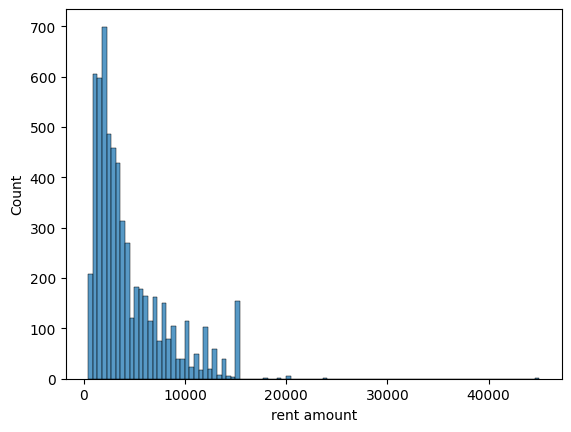

In [ ]:
import seaborn as sns

sns.histplot(
    data = data,
    x = "rent amount"
)

<Axes: xlabel='rent amount', ylabel='Count'>

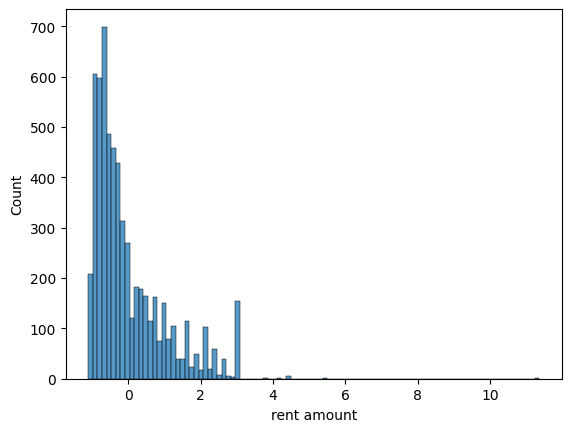

In [ ]:
# Z-Score Normalizing
mean = np.mean(data["rent amount"])
sd = np.std(data["rent amount"])

data["rent amount"] = (data["rent amount"] - mean) / sd

sns.histplot(
    data = data,
    x = "rent amount"
)

# Dealing with Multiple Dates

In [ ]:
import random

# Let's create a fake dataframe that has date and euros_earned in March.
data = pd.DataFrame()

dates = []

for i in range(50):
    dates.append(f"March {random.randint(1,31)}, 2023")
    dates.append(f"{random.randint(1,31)}.3.2023")
    dates.append(f"{random.randint(1,31)}-3-2023")

data["date"] = dates
data["amount_earned"] = [np.round(i, 2) for i in np.random.normal(1000, 100, len(dates))]
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
# By default, pandas/datetime has a built-in function for inferring the date
# IMPORTANT NOTE: This is not always correct!!!!

pd.to_datetime(data['date'], infer_datetime_format=True)

/var/folders/2s/38kg81v526j7qcgd8gdq8jd00000gn/T/ipykernel_47983/36023917.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pd.to_datetime(data['date'], infer_datetime_format=True)
/var/folders/2s/38kg81v526j7qcgd8gdq8jd00000gn/T/ipykernel_47983/36023917.py:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(data['date'], infer_datetime_format=True)


ValueError: time data "March 26, 2023" doesn't match format "%d.%m.%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# If this doesn't work, there's multiple ways to do this but I guess a for-loop is the easiest way.
from datetime import datetime

# Manually look for all of the possible formats.
formats = ['%B %d, %Y', "%d.%m.%Y", "%d-%m-%Y"]

# Iterate through each row in the dataframe.
for idx, row in data.iterrows():

    # Get the specific date for this row.
    date = row["date"]

    # Initialize a variable to be False.
    date_can_be_parsed = False

    # Iterate through the possible formats.
    for fmt in formats:
        # Try to parse the date into the format.
        try:
            new_date = datetime.strptime(date, fmt)

            # If the date can be parsed, change date_can_be_parsed to be True.
            date_can_be_parsed = True

            # Since this date can be parsed, write the new date in the %B %d %Y format.
            # Example: 31.03.2023 -> March 31, 2023
            new_date = new_date.strftime("%d-%m-%Y")

            # With this new date, change the value at this index to be the new date.
            data.loc[idx, "new_date"] = new_date

            # If this fails, move on to the next format
        except:
            pass

    # If date_can_be_parsed is still False (i.e. cannot be parsed into any of the formats),
    # throw an error by saying `assert False`.
    if not date_can_be_parsed:
        assert False, f"{idx}: {date} is not in any of the possible formats."

# Turn the column into a datetime object.
data["new_date"] = pd.to_datetime(data["new_date"], format="%d-%m-%Y")

In [ ]:
data

,date,amount_earned,new_date
0,17.3.2023,1009.69,2023-03-17
1,17.3.2023,1120.87,2023-03-17
2,"March 26, 2023",1003.65,2023-03-26
3,30.3.2023,1015.09,2023-03-30
4,"March 7, 2023",958.29,2023-03-07
...,...,...,...
145,25.3.2023,1049.84,2023-03-25
146,22-3-2023,987.16,2023-03-22
147,15.3.2023,1165.89,2023-03-15
148,30-3-2023,940.56,2023-03-30
